# Temperature in Poland in 2023
This is a project for visualization and analysis of the temperatures in Poland in 2023.

Źródłem pochodzenia danych jest Instytut Meteorologii i Gospodarki Wodnej – Państwowy Instytut Badawczy 

Data source: Institute of Meteorology and Water Management – National Research Institute \
https://danepubliczne.imgw.pl

In [230]:
# to check the encoding
with open('train.csv') as f:
    print(f)

<_io.TextIOWrapper name='train.csv' mode='r' encoding='cp1250'>


In [231]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

df = pd.read_csv('train.csv', encoding='cp1250', header=None)
new_header = ['station_code', 'station_name', 'year', 'month', 'avg_month_temp_C', 'temp_status', 'avg_moth_humidity_%', 'WLGS_status', 'avg_month_wing_speed_m/s', 'FWS_status', 'avg_month_cloud_cover', 'NOS_status']
df.columns = new_header

pd.set_option('display.min_rows', 30)

df

,station_code,station_name,year,month,avg_month_temp_C,temp_status,avg_moth_humidity_%,WLGS_status,avg_month_wing_speed_m/s,FWS_status,avg_month_cloud_cover,NOS_status
0,249180010,PSZCZYNA,2023,1,2.4,NaN,0.0,8.0,1.9,NaN,6.3,NaN
1,249180010,PSZCZYNA,2023,2,0.8,NaN,0.0,8.0,2.2,NaN,6.1,NaN
2,249180010,PSZCZYNA,2023,3,5.6,NaN,0.0,8.0,2.3,NaN,5.5,NaN
3,249180010,PSZCZYNA,2023,4,7.8,NaN,0.0,8.0,1.3,NaN,5.8,NaN
4,249180010,PSZCZYNA,2023,5,12.6,NaN,0.0,8.0,1.3,NaN,4.5,NaN
5,249180010,PSZCZYNA,2023,6,17.8,NaN,0.0,8.0,1.2,NaN,4.3,NaN
6,249180010,PSZCZYNA,2023,7,19.8,NaN,0.0,8.0,1.1,NaN,3.7,NaN
7,249180010,PSZCZYNA,2023,8,19.5,NaN,0.0,8.0,1.0,NaN,4.6,NaN
8,249180010,PSZCZYNA,2023,9,17.3,NaN,0.0,8.0,1.0,NaN,3.3,NaN
9,249180010,PSZCZYNA,2023,10,12.0,NaN,0.0,8.0,1.5,NaN,4.8,NaN


Let's keep only the data related to temperature.

In [232]:
columns_to_remove = ['avg_moth_humidity_%', 'WLGS_status', 'avg_month_wing_speed_m/s','FWS_status','avg_month_cloud_cover', 'NOS_status']
df.drop(columns_to_remove, axis=1, inplace = True)
df

,station_code,station_name,year,month,avg_month_temp_C,temp_status
0,249180010,PSZCZYNA,2023,1,2.4,NaN
1,249180010,PSZCZYNA,2023,2,0.8,NaN
2,249180010,PSZCZYNA,2023,3,5.6,NaN
3,249180010,PSZCZYNA,2023,4,7.8,NaN
4,249180010,PSZCZYNA,2023,5,12.6,NaN
5,249180010,PSZCZYNA,2023,6,17.8,NaN
6,249180010,PSZCZYNA,2023,7,19.8,NaN
7,249180010,PSZCZYNA,2023,8,19.5,NaN
8,249180010,PSZCZYNA,2023,9,17.3,NaN
9,249180010,PSZCZYNA,2023,10,12.0,NaN


In the instructions to the dataset we read that status value equal to 8 means no measure was taken. Let's find those records and remove them.

In [233]:
df.loc[df.temp_status == 8]

,station_code,station_name,year,month,avg_month_temp_C,temp_status
251,250200230,BORUSOWA,2023,10,0.0,8.0
292,250230160,CIESZANÓW,2023,8,0.0,8.0
293,250230160,CIESZANÓW,2023,9,0.0,8.0
329,251190050,PUCZNIEW,2023,1,0.0,8.0
330,251190050,PUCZNIEW,2023,2,0.0,8.0
331,251190050,PUCZNIEW,2023,3,0.0,8.0
332,251190050,PUCZNIEW,2023,4,0.0,8.0
333,251190050,PUCZNIEW,2023,5,0.0,8.0
334,251190050,PUCZNIEW,2023,6,0.0,8.0
335,251190050,PUCZNIEW,2023,7,0.0,8.0


We can see there is some. Let's reomve them.

In [234]:
df = df[df['temp_status'] != 8]
df.loc[df.temp_status == 8]

,station_code,station_name,year,month,avg_month_temp_C,temp_status


In [235]:
columns_to_keep = ['station_name','month', 'avg_month_temp_C']
temp_df = df[columns_to_keep]

temp_df

,station_name,month,avg_month_temp_C
0,PSZCZYNA,1,2.4
1,PSZCZYNA,2,0.8
2,PSZCZYNA,3,5.6
3,PSZCZYNA,4,7.8
4,PSZCZYNA,5,12.6
5,PSZCZYNA,6,17.8
6,PSZCZYNA,7,19.8
7,PSZCZYNA,8,19.5
8,PSZCZYNA,9,17.3
9,PSZCZYNA,10,12.0


We can now see the average temperature for each station for each month.

Let's see the average for each station for the whole year.

In [236]:
avg_by_station = temp_df.groupby('station_name')['avg_month_temp_C'].mean().round(1).reset_index()
avg_by_station

,station_name,avg_month_temp_C
0,BABIMOST,11.1
1,BIAŁOWIEŻA,7.7
2,BIEBRZA-PIEŃCZYKÓWEK,9.5
3,BORUSOWA,11.8
4,BRENNA,11.0
5,BUKOWINA TATRZAŃSKA,8.1
6,CEBER,11.3
7,CHRZĄSTOWO,10.5
8,CIESZANÓW,8.8
9,DOLINA PIĘCIU STAWÓW,3.6


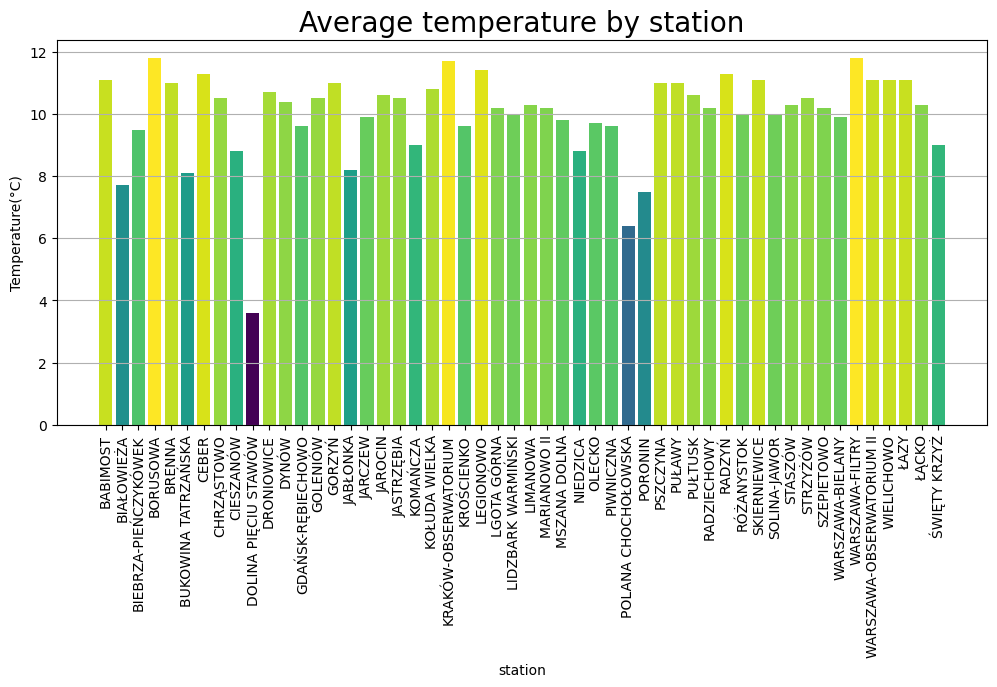

In [249]:
x = avg_by_station["station_name"]
y = avg_by_station["avg_month_temp_C"]

norm = mcolors.Normalize(vmin=min(y), vmax=max(y))
cmap = plt.cm.viridis
colors = cmap(norm(y))

plt.figure(figsize=(12, 5))
plt.bar(x, y, label = "temperature", color=colors)

plt.xticks(rotation = 90)
plt.xlabel('station')
plt.ylabel('Temperature(°C)')
plt.title("Average temperature by station 2023", fontsize = 20)
plt.grid(axis='y')
plt.show()

In [238]:
average_temp = temp_df['avg_month_temp_C'].mean().round(1)
print(average_temp)

10.0


The average temperature in Poland in the year 2023 was 10°C.